In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

In [2]:
avocado = pd.read_csv("avocado.csv")
avocado

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [3]:
avocado.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [4]:
avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [5]:
avocado.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [6]:
avocado.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

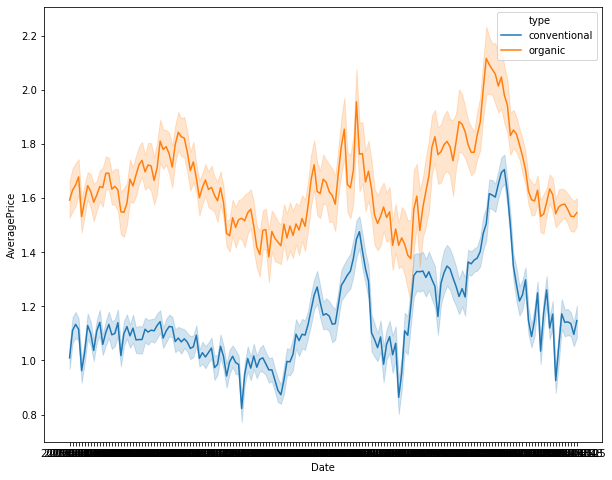

In [7]:
plt.figure(figsize=(10,8))
sns.lineplot(data=avocado,x="Date",y="AveragePrice",hue="type")

In [8]:
avocado.sample(20)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
3855,7,2016-11-06,1.41,127895.28,43990.00,21710.64,289.79,61904.85,16137.03,45767.82,0.00,conventional,2016,Jacksonville
17838,9,2018-01-21,1.48,9495.46,281.81,1266.88,0.00,7884.46,4149.72,3734.74,0.00,organic,2018,Indianapolis
4956,16,2016-09-04,1.06,550756.68,186260.68,164050.31,12126.32,188319.37,177175.95,10942.03,201.39,conventional,2016,SanDiego
7430,12,2017-10-08,1.60,84870.68,35817.02,10330.12,1240.80,37482.74,29940.23,7542.51,0.00,conventional,2017,Pittsburgh
3626,38,2016-04-03,1.04,2968139.47,441199.94,1373509.11,360264.17,793166.25,494820.07,265657.44,32688.74,conventional,2016,GreatLakes
7199,46,2017-02-12,1.19,5367769.78,736158.49,3387834.41,45051.71,1198725.17,1079129.70,111229.11,8366.36,conventional,2017,Northeast
6732,3,2017-12-10,1.03,288441.17,65071.68,94140.95,4760.32,124468.22,62945.15,61291.96,231.11,conventional,2017,LasVegas
11073,23,2015-07-19,1.76,6069.35,93.14,2710.15,780.46,2485.60,1873.03,612.57,0.00,organic,2015,RaleighGreensboro
2479,35,2015-04-26,1.08,80443.94,41208.97,24094.05,2597.12,12543.80,12543.80,0.00,0.00,conventional,2015,Spokane
8336,17,2017-09-03,1.57,26808410.65,9775062.87,8565265.61,541902.88,7926179.29,5851814.47,1855970.25,218394.57,conventional,2017,TotalUS


In [9]:
df = avocado.dropna()

In [10]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [11]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

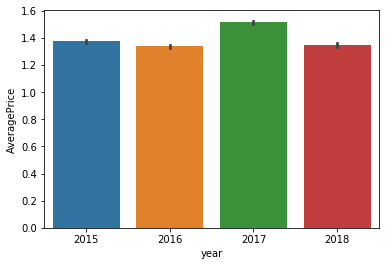

In [12]:
sns.barplot(x="year",y="AveragePrice",data=df)

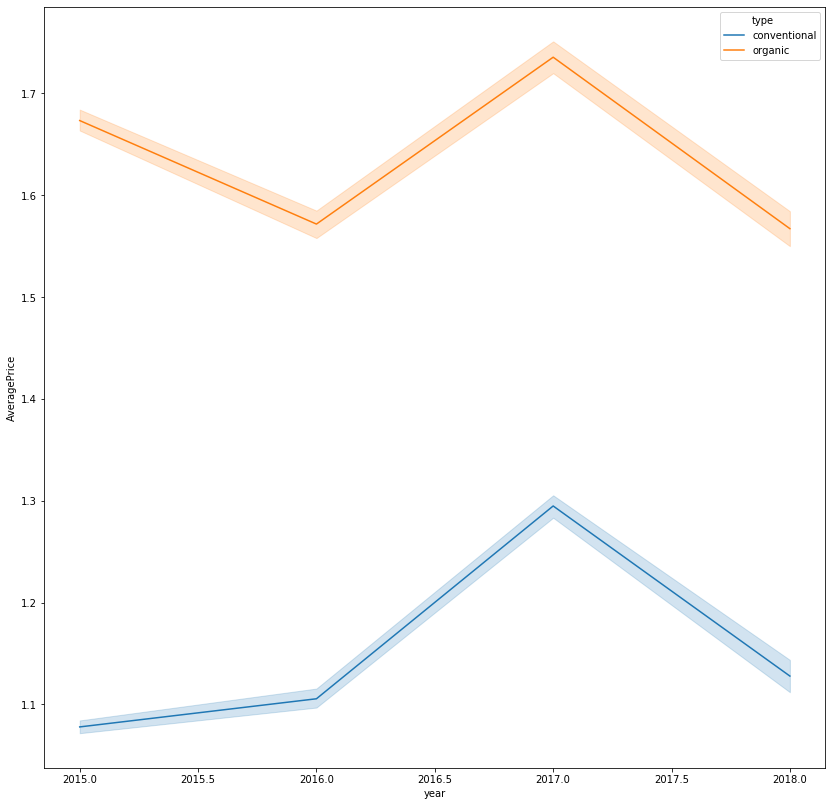

In [13]:
plt.figure(figsize=(14,14))
sns.lineplot(data=df,x="year",y="AveragePrice",hue="type")

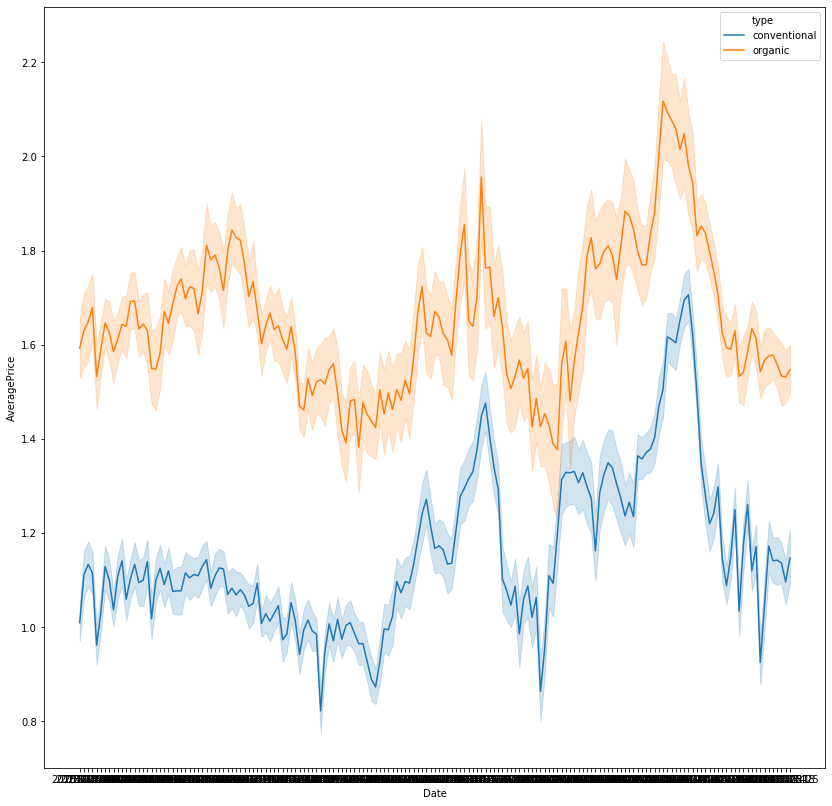

In [14]:
plt.figure(figsize=(14,14))
sns.lineplot(data=df,x="Date",y="AveragePrice",hue="type")

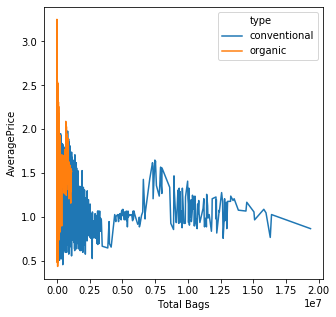

In [15]:
plt.figure(figsize=(5,5))
sns.lineplot(data=df,x="Total Bags",y="AveragePrice",hue="type")

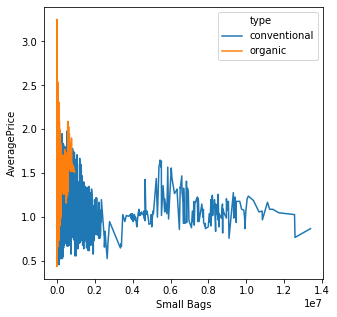

In [16]:
plt.figure(figsize=(5,5))
sns.lineplot(data=df,x="Small Bags",y="AveragePrice",hue="type")

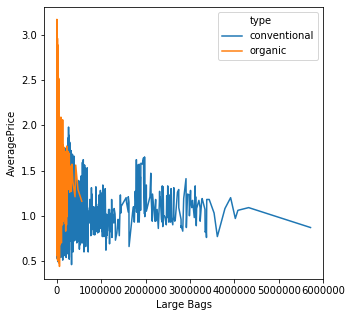

In [17]:
plt.figure(figsize=(5,5))
sns.lineplot(data=df,x="Large Bags",y="AveragePrice",hue="type")

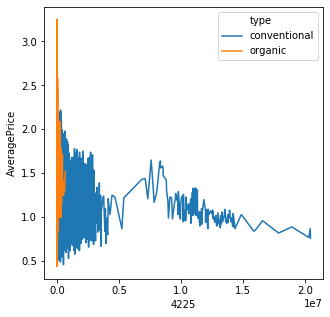

In [18]:
plt.figure(figsize=(5,5))
sns.lineplot(data=df,x="4225",y="AveragePrice",hue="type")

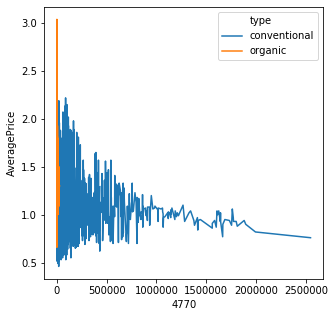

In [19]:
plt.figure(figsize=(5,5))
sns.lineplot(data=df,x="4770",y="AveragePrice",hue="type")

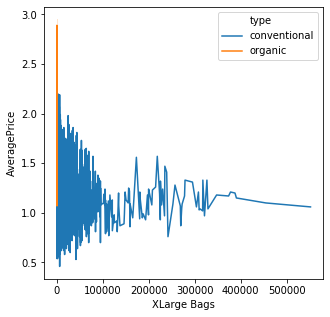

In [20]:
plt.figure(figsize=(5,5))
sns.lineplot(data=df,x="XLarge Bags",y="AveragePrice",hue="type")

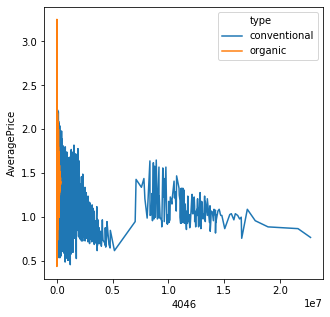

In [21]:
plt.figure(figsize=(5,5))
sns.lineplot(data=df,x="4046",y="AveragePrice",hue="type")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000211301EBA88>,
      dtype=object)

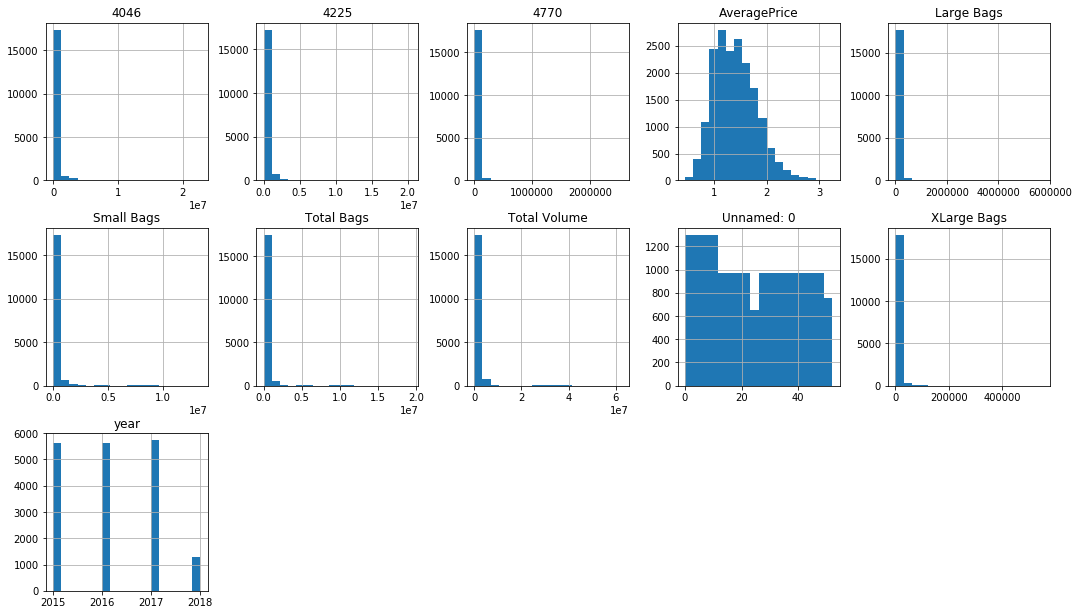

In [22]:
df.hist(figsize=(18,18),layout=(5,5),bins=18)

In [23]:
df["region"].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [24]:
df["type"].unique()

array(['conventional', 'organic'], dtype=object)

In [25]:
df["year"].unique()

array([2015, 2016, 2017, 2018], dtype=int64)

In [26]:
df["XLarge Bags"].unique()

array([  0.  ,  33.33, 104.17, ..., 228.27,  12.12,  24.18])

In [27]:
df.corr()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
Unnamed: 0,1.000000,-0.133008,0.014035,0.017628,0.019829,0.041752,-0.002219,0.000347,-0.009196,-0.011546,-0.171667
AveragePrice,-0.133008,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,0.014035,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,0.017628,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,0.019829,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,0.041752,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.002219,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,0.000347,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.009196,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.011546,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033


In [28]:
df.skew()

Unnamed: 0       0.108334
AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

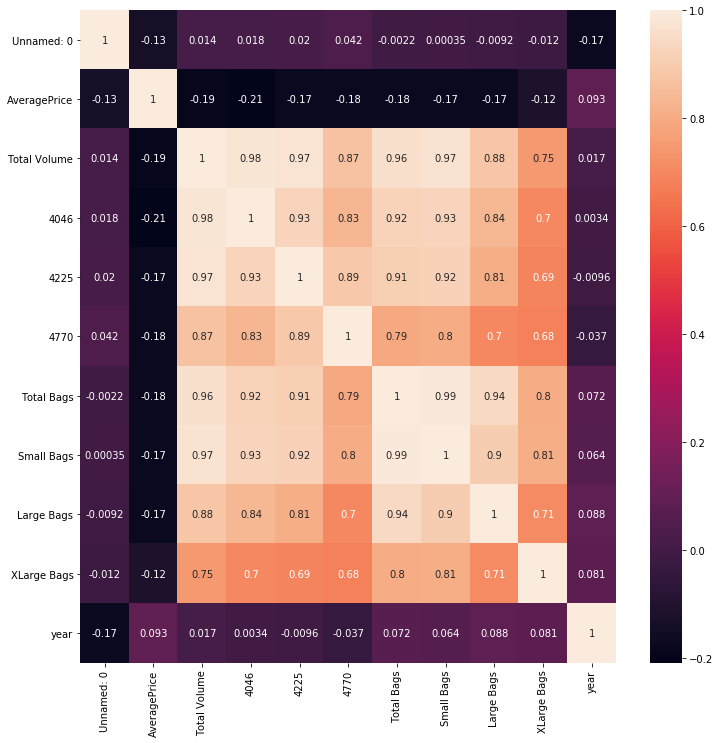

In [29]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot = True)
plt.show()

In [30]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
        return col_corr

In [31]:
corr_features = correlation(df,0.85)
len(set(corr_features))

0

no correlation between independent variables observed

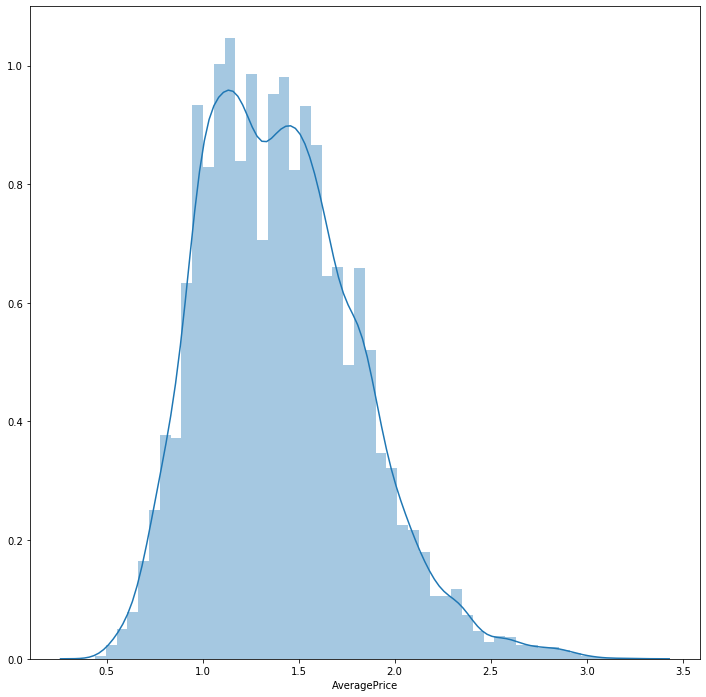

In [32]:
plt.figure(figsize=(12,12))
x = df["AveragePrice"]
sns.distplot(x)

<Figure size 864x864 with 0 Axes>

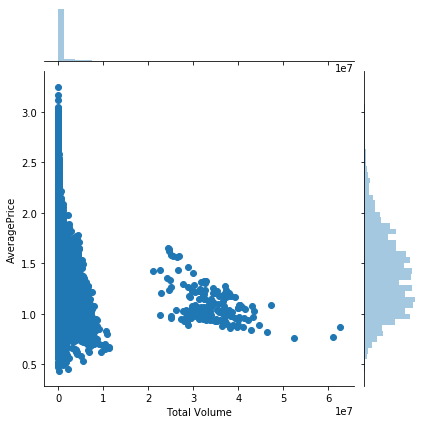

In [33]:
plt.figure(figsize=(12,12))
sns.jointplot(data=df,x="Total Volume",y ="AveragePrice")


<Figure size 864x864 with 0 Axes>

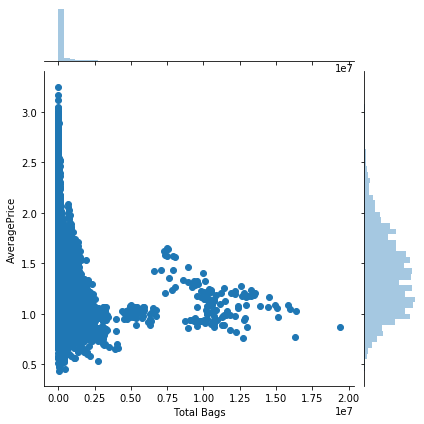

In [34]:
plt.figure(figsize=(12,12))
sns.jointplot(data=df,x="Total Bags",y ="AveragePrice")

<Figure size 864x864 with 0 Axes>

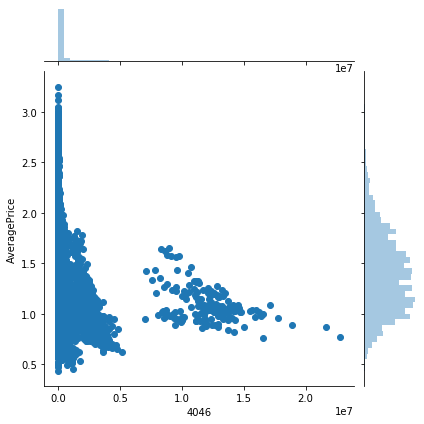

In [35]:
plt.figure(figsize=(12,12))
sns.jointplot(data=df,x="4046",y ="AveragePrice")

<Figure size 864x864 with 0 Axes>

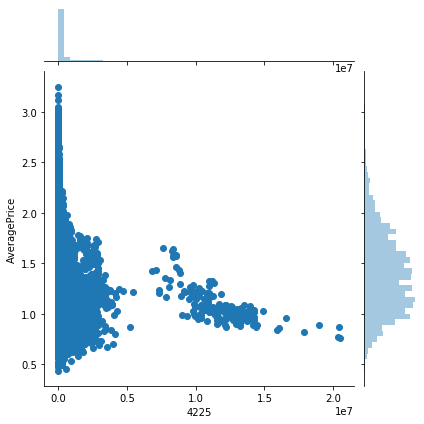

In [36]:
plt.figure(figsize=(12,12))
sns.jointplot(data=df,x="4225",y ="AveragePrice")

<Figure size 864x864 with 0 Axes>

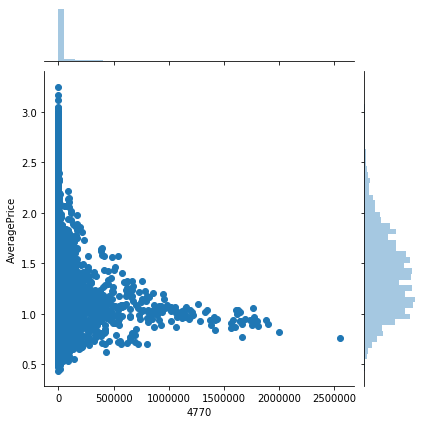

In [37]:
plt.figure(figsize=(12,12))
sns.jointplot(data=df,x="4770",y ="AveragePrice")

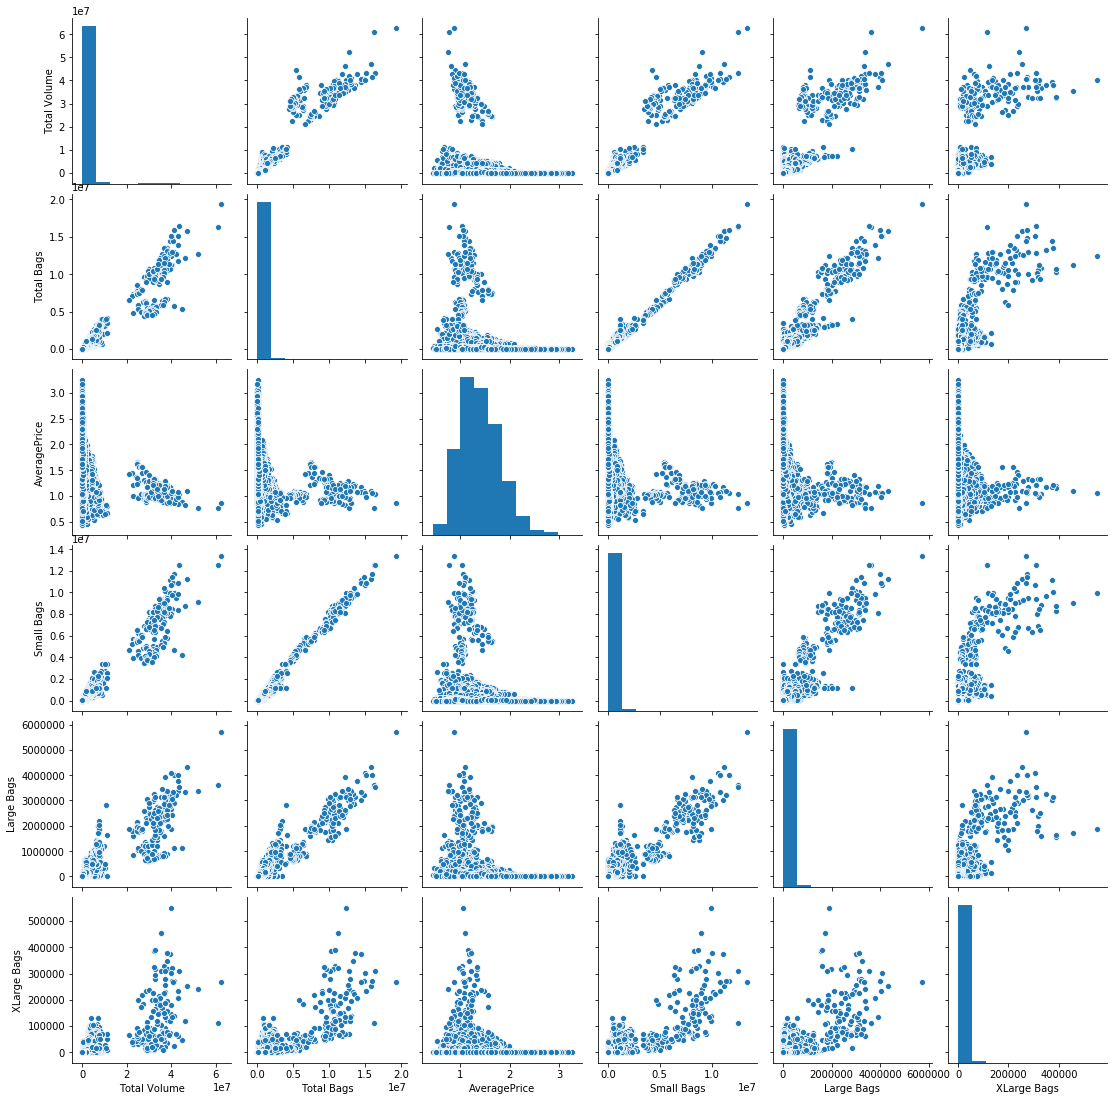

In [38]:
df_new = df[["Total Volume","Total Bags","AveragePrice","Small Bags","Large Bags",'XLarge Bags']]
sns.pairplot(df_new)

In [39]:
avo =df.drop(["year","Date","Unnamed: 0"],axis=1)
avo

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico


In [40]:
avo.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany


In [41]:
avo.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000


AveragePrice       AxesSubplot(0.125,0.749828;0.133621x0.130172)
Total Volume    AxesSubplot(0.285345,0.749828;0.133621x0.130172)
4046             AxesSubplot(0.44569,0.749828;0.133621x0.130172)
4225            AxesSubplot(0.606034,0.749828;0.133621x0.130172)
4770            AxesSubplot(0.766379,0.749828;0.133621x0.130172)
Total Bags         AxesSubplot(0.125,0.593621;0.133621x0.130172)
Small Bags      AxesSubplot(0.285345,0.593621;0.133621x0.130172)
Large Bags       AxesSubplot(0.44569,0.593621;0.133621x0.130172)
XLarge Bags     AxesSubplot(0.606034,0.593621;0.133621x0.130172)
dtype: object

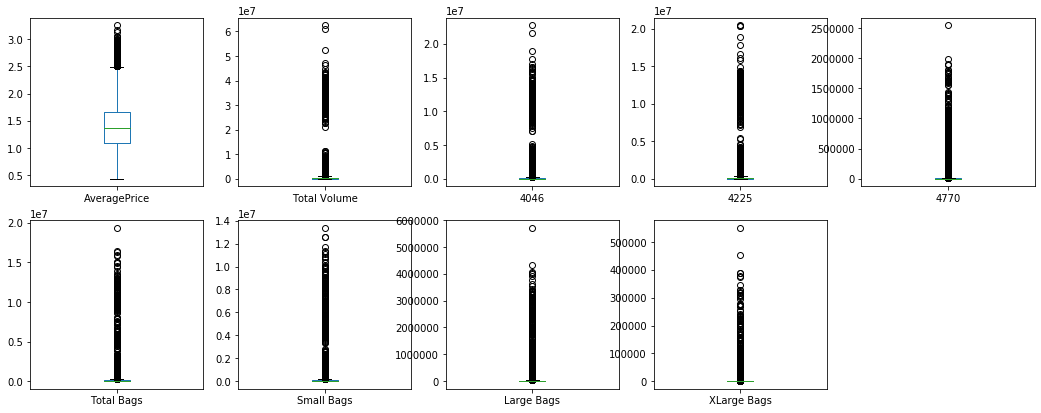

In [42]:
avo.plot(kind="box",subplots=True,layout=(5,5),figsize=(18,18))

In [43]:
avo.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
region           object
dtype: object

In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
avo["region"]   = le.fit_transform(avo["region"].astype(str))
avo["type"]   = le.fit_transform(avo["region"].astype(str))

In [45]:
avo.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int32
region            int32
dtype: object

AveragePrice       AxesSubplot(0.125,0.749828;0.133621x0.130172)
Total Volume    AxesSubplot(0.285345,0.749828;0.133621x0.130172)
4046             AxesSubplot(0.44569,0.749828;0.133621x0.130172)
4225            AxesSubplot(0.606034,0.749828;0.133621x0.130172)
4770            AxesSubplot(0.766379,0.749828;0.133621x0.130172)
Total Bags         AxesSubplot(0.125,0.593621;0.133621x0.130172)
Small Bags      AxesSubplot(0.285345,0.593621;0.133621x0.130172)
Large Bags       AxesSubplot(0.44569,0.593621;0.133621x0.130172)
XLarge Bags     AxesSubplot(0.606034,0.593621;0.133621x0.130172)
type            AxesSubplot(0.766379,0.593621;0.133621x0.130172)
region             AxesSubplot(0.125,0.437414;0.133621x0.130172)
dtype: object

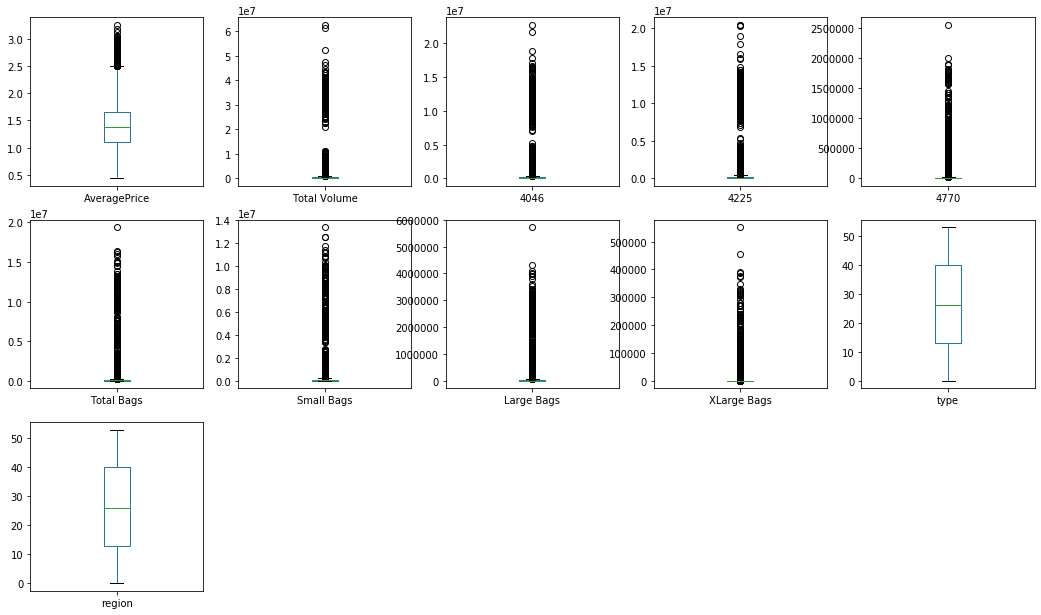

In [46]:
avo.plot(kind="box",subplots=True,layout=(5,5),figsize=(18,18))

In [47]:
from scipy.stats import zscore
z = np.abs(zscore(avo))
z
print(avo.shape)
avocado_final =avo.loc[(z<3).all(axis=1)]
print(avocado_final.shape)

(18249, 11)
(17651, 11)


In [48]:
avocado_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17651 entries, 0 to 18248
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  17651 non-null  float64
 1   Total Volume  17651 non-null  float64
 2   4046          17651 non-null  float64
 3   4225          17651 non-null  float64
 4   4770          17651 non-null  float64
 5   Total Bags    17651 non-null  float64
 6   Small Bags    17651 non-null  float64
 7   Large Bags    17651 non-null  float64
 8   XLarge Bags   17651 non-null  float64
 9   type          17651 non-null  int32  
 10  region        17651 non-null  int32  
dtypes: float64(9), int32(2)
memory usage: 1.5 MB


In [49]:
avocado_final.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
count,17651.000000,1.765100e+04,1.765100e+04,1.765100e+04,17651.000000,1.765100e+04,1.765100e+04,17651.000000,17651.000000,17651.000000,17651.000000
mean,1.405363,4.612232e+05,1.546436e+05,1.656009e+05,11160.558411,1.298160e+05,1.006283e+05,27830.325482,1357.351712,26.113761,26.103110
std,0.385793,1.012727e+06,4.395780e+05,3.991041e+05,34488.049314,2.821081e+05,2.295134e+05,73026.707330,5240.345626,15.483936,15.396005
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.110000,1.056651e+04,8.219250e+02,2.889740e+03,0.000000,4.959780e+03,2.746415e+03,112.660000,0.000000,13.000000,13.000000
50%,1.380000,1.002071e+05,7.785240e+03,2.670378e+04,163.960000,3.756260e+04,2.454157e+04,2448.660000,0.000000,26.000000,26.000000
75%,1.660000,3.911843e+05,9.840492e+04,1.288019e+05,5284.600000,1.020218e+05,7.838981e+04,19089.250000,73.670000,39.000000,39.000000
max,2.610000,8.362504e+06,4.085859e+06,3.894802e+06,344488.510000,2.782725e+06,2.348868e+06,781447.290000,55940.330000,53.000000,53.000000


In [50]:
x = avocado_final.drop(["AveragePrice"],axis=1)
y = avocado_final["AveragePrice"]
df_x = x = avocado_final.drop(["AveragePrice"],axis=1)

In [51]:
x.shape

(17651, 10)

In [52]:
y.shape

(17651,)

In [53]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x = pd.DataFrame(x,columns=df_x.columns)

In [54]:
x.skew()

Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type            0.032013
region          0.012798
dtype: float64

In [55]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
x = pt.fit_transform(x)  
x = pd.DataFrame(x,columns=df_x.columns)
x
     

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,-0.571229,-0.764596,-0.029905,-0.664880,-0.840353,-0.750932,-0.807589,-0.513907,-1.704897,-1.702223
1,-0.626867,-0.772259,-0.167107,-0.661802,-0.821593,-0.727154,-0.807109,-0.513907,-1.704897,-1.702223
2,-0.271095,-0.769711,0.590605,-0.640050,-0.853212,-0.767637,-0.806468,-0.513907,-1.704897,-1.702223
3,-0.485717,-0.762586,0.194337,-0.657495,-0.908213,-0.839001,-0.803000,-0.513907,-1.704897,-1.702223
4,-0.649995,-0.766608,-0.178676,-0.656529,-0.899365,-0.829588,-0.795771,-0.513907,-1.704897,-1.702223
...,...,...,...,...,...,...,...,...,...,...
17646,-0.862926,-0.743338,-0.878849,-0.679495,-0.730588,-0.621325,-0.769435,-0.513907,1.466520,1.739911
17647,-0.883677,-0.761326,-0.843411,-0.679495,-0.827166,-0.740966,-0.781448,-0.513907,1.466520,1.739911
17648,-0.884469,-0.761322,-0.861594,-0.465744,-0.824172,-0.728811,-0.813370,-0.513907,1.466520,1.739911
17649,-0.868575,-0.754249,-0.851767,-0.466008,-0.787915,-0.682977,-0.812496,-0.513907,1.466520,1.739911


In [56]:
x.skew()

Total Volume    0.728259
4046            1.006111
4225            0.836245
4770            1.196401
Total Bags      0.677480
Small Bags      0.706580
Large Bags      0.956661
XLarge Bags     1.682479
type            0.006883
region          0.003622
dtype: float64

In [57]:
x.head() 

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,-0.571229,-0.764596,-0.029905,-0.664880,-0.840353,-0.750932,-0.807589,-0.513907,-1.704897,-1.702223
1,-0.626867,-0.772259,-0.167107,-0.661802,-0.821593,-0.727154,-0.807109,-0.513907,-1.704897,-1.702223
2,-0.271095,-0.769711,0.590605,-0.640050,-0.853212,-0.767637,-0.806468,-0.513907,-1.704897,-1.702223
3,-0.485717,-0.762586,0.194337,-0.657495,-0.908213,-0.839001,-0.803000,-0.513907,-1.704897,-1.702223
4,-0.649995,-0.766608,-0.178676,-0.656529,-0.899365,-0.829588,-0.795771,-0.513907,-1.704897,-1.702223


In [99]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
max_r_score=0
for r_state in range(42,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=r_state)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    r2_scr = r2_score(y_test,pred)
    if r2_scr > max_r_score:
        max_r_score = r2_scr
        final_r_state= r_state
print("max r2 score to ", final_r_state,"is", max_r_score)

max r2 score to  131 is 0.4070901323564864


In [100]:
from sklearn.model_selection import cross_val_score
a_score = cross_val_score(LinearRegression(),x,y,cv=5,scoring ="r2")
a_score

array([0.13923776, 0.25753969, 0.29137288, 0.32381952, 0.39645855])

In [101]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge
ls = Lasso()
parameters = {"alpha":[0.0001,0.001,0.01,0.1]}
clf= GridSearchCV(ls,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.01}

In [102]:
ls = Lasso(alpha=0.0001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.3777282380333223

In [103]:
rg = Ridge(alpha=0.0001)
rg.fit(x_train,y_train)
rg.score(x_train,y_train)

0.37772824783809267

In [63]:
from sklearn.ensemble import GradientBoostingRegressor
import warnings 
warnings.filterwarnings("ignore")
gbr = GradientBoostingRegressor()
parameters = {"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[50,100,150,200,250]}
clft = GridSearchCV(gbr,parameters,cv=5)
clft.fit(x,y)
clft.best_params_

{'learning_rate': 0.1, 'n_estimators': 250}

In [65]:
gbr = GradientBoostingRegressor(learning_rate=0.1,n_estimators =250)
print("Mean r2 score for gradient boosting regressor is" ,cross_val_score(gbr,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation for gradient boosting regressor is" ,cross_val_score(gbr,x,y,cv=5,scoring="r2").std())


Mean r2 score for gradient boosting regressor is 0.17114052541064537
Standard Deviation for gradient boosting regressor is 0.3526369083137255


In [66]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

In [67]:
knr = KNeighborsRegressor()
parameters = {"n_neighbors": range(1,20)}
gsc = GridSearchCV(knr,parameters,cv=5)
gsc.fit(x,y)
gsc.best_params_

{'n_neighbors': 19}

In [68]:
knr = KNeighborsRegressor(n_neighbors=7)
knr.fit(x_train,y_train)
pred = knr.predict(x_test)
r2 = r2_score(y_test,pred)
print("r2 ;",r2*100)

r2 ; 78.9914082235466


In [69]:
def maxr2_score(regr,x,y):
    max_r_score = 0 
    for r_state in range(42,200):
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=r_state)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr = r2_score(y_test,y_pred)
        print("r2 score corresponding to ",r_state,"is",r2_score)
        if r2_scr>max_r_score:
            max_r_score = r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state,"is",max_r_score)
    return final_r_state

In [70]:
r_state = maxr2_score(lr,x,y)

r2 score corresponding to  42 is <function r2_score at 0x000002112E7ABA68>
r2 score corresponding to  43 is <function r2_score at 0x000002112E7ABA68>
r2 score corresponding to  44 is <function r2_score at 0x000002112E7ABA68>
r2 score corresponding to  45 is <function r2_score at 0x000002112E7ABA68>
r2 score corresponding to  46 is <function r2_score at 0x000002112E7ABA68>
r2 score corresponding to  47 is <function r2_score at 0x000002112E7ABA68>
r2 score corresponding to  48 is <function r2_score at 0x000002112E7ABA68>
r2 score corresponding to  49 is <function r2_score at 0x000002112E7ABA68>
r2 score corresponding to  50 is <function r2_score at 0x000002112E7ABA68>
r2 score corresponding to  51 is <function r2_score at 0x000002112E7ABA68>
r2 score corresponding to  52 is <function r2_score at 0x000002112E7ABA68>
r2 score corresponding to  53 is <function r2_score at 0x000002112E7ABA68>
r2 score corresponding to  54 is <function r2_score at 0x000002112E7ABA68>
r2 score corresponding to

r2 score corresponding to  163 is <function r2_score at 0x000002112E7ABA68>
r2 score corresponding to  164 is <function r2_score at 0x000002112E7ABA68>
r2 score corresponding to  165 is <function r2_score at 0x000002112E7ABA68>
r2 score corresponding to  166 is <function r2_score at 0x000002112E7ABA68>
r2 score corresponding to  167 is <function r2_score at 0x000002112E7ABA68>
r2 score corresponding to  168 is <function r2_score at 0x000002112E7ABA68>
r2 score corresponding to  169 is <function r2_score at 0x000002112E7ABA68>
r2 score corresponding to  170 is <function r2_score at 0x000002112E7ABA68>
r2 score corresponding to  171 is <function r2_score at 0x000002112E7ABA68>
r2 score corresponding to  172 is <function r2_score at 0x000002112E7ABA68>
r2 score corresponding to  173 is <function r2_score at 0x000002112E7ABA68>
r2 score corresponding to  174 is <function r2_score at 0x000002112E7ABA68>
r2 score corresponding to  175 is <function r2_score at 0x000002112E7ABA68>
r2 score cor

In [71]:
knr = KNeighborsRegressor(n_neighbors=7)
r_state = maxr2_score(knr,x,y)

r2 score corresponding to  42 is <function r2_score at 0x000002112E7ABA68>
r2 score corresponding to  43 is <function r2_score at 0x000002112E7ABA68>
r2 score corresponding to  44 is <function r2_score at 0x000002112E7ABA68>
r2 score corresponding to  45 is <function r2_score at 0x000002112E7ABA68>
r2 score corresponding to  46 is <function r2_score at 0x000002112E7ABA68>
r2 score corresponding to  47 is <function r2_score at 0x000002112E7ABA68>
r2 score corresponding to  48 is <function r2_score at 0x000002112E7ABA68>
r2 score corresponding to  49 is <function r2_score at 0x000002112E7ABA68>
r2 score corresponding to  50 is <function r2_score at 0x000002112E7ABA68>
r2 score corresponding to  51 is <function r2_score at 0x000002112E7ABA68>
r2 score corresponding to  52 is <function r2_score at 0x000002112E7ABA68>
r2 score corresponding to  53 is <function r2_score at 0x000002112E7ABA68>
r2 score corresponding to  54 is <function r2_score at 0x000002112E7ABA68>
r2 score corresponding to

r2 score corresponding to  152 is <function r2_score at 0x000002112E7ABA68>
r2 score corresponding to  153 is <function r2_score at 0x000002112E7ABA68>
r2 score corresponding to  154 is <function r2_score at 0x000002112E7ABA68>
r2 score corresponding to  155 is <function r2_score at 0x000002112E7ABA68>
r2 score corresponding to  156 is <function r2_score at 0x000002112E7ABA68>
r2 score corresponding to  157 is <function r2_score at 0x000002112E7ABA68>
r2 score corresponding to  158 is <function r2_score at 0x000002112E7ABA68>
r2 score corresponding to  159 is <function r2_score at 0x000002112E7ABA68>
r2 score corresponding to  160 is <function r2_score at 0x000002112E7ABA68>
r2 score corresponding to  161 is <function r2_score at 0x000002112E7ABA68>
r2 score corresponding to  162 is <function r2_score at 0x000002112E7ABA68>
r2 score corresponding to  163 is <function r2_score at 0x000002112E7ABA68>
r2 score corresponding to  164 is <function r2_score at 0x000002112E7ABA68>
r2 score cor

here KneighborsRegressor gave me best score of approx 80%

In [104]:
from sklearn.externals import joblib
joblib.dump(knr,"Avocado Prices.obj")

['Avocado Prices.obj']

In [105]:
model1 = joblib.load("Avocado Prices.obj")

In [106]:
model1.predict(x_test)

array([1.05142857, 2.03428571, 1.64      , ..., 0.89571429, 1.58714286,
       1.81142857])

In [75]:
from scipy.stats import zscore
z = np.abs(zscore(avo))
z
print(avo.shape)
av =avo.loc[(z<3).all(axis=1)]
print(av.shape)

(18249, 11)
(17651, 11)


In [76]:
x = av.drop(["region"],axis=1)
y = av["region"]
df_x = av.drop(["region"],axis=1)

In [77]:
x.shape

(17651, 10)

In [78]:
x.skew()

AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type            0.032013
dtype: float64

In [79]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
x = pt.fit_transform(x)  
x = pd.DataFrame(x,columns=df_x.columns)
x
    

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type
0,-0.117824,-0.075324,-0.657421,0.351430,-0.222566,-0.537507,-0.347421,-0.781153,-0.677919,-2.014989
1,-0.064330,-0.147497,-0.777179,0.269513,-0.175223,-0.498128,-0.311322,-0.771198,-0.677919,-2.014989
2,-1.298865,0.205556,-0.731776,0.649333,0.023923,-0.566369,-0.374453,-0.758523,-0.677919,-2.014989
3,-0.829026,0.019655,-0.632592,0.468799,-0.121164,-0.713068,-0.510991,-0.699123,-0.677919,-2.014989
4,-0.253635,-0.180674,-0.684504,0.262126,-0.110491,-0.686312,-0.490534,-0.607027,-0.677919,-2.014989
...,...,...,...,...,...,...,...,...,...,...
17646,0.639410,-0.678214,-0.462066,-0.926028,-1.228986,-0.340422,-0.175753,-0.412401,-0.677919,1.364017
17647,0.826487,-0.771326,-0.618019,-0.670600,-1.228986,-0.509513,-0.331971,-0.484991,-0.677919,1.364017
17648,1.184324,-0.775274,-0.617966,-0.778893,0.445710,-0.503366,-0.313756,-0.950743,-0.677919,1.364017
17649,1.313296,-0.701797,-0.547011,-0.716371,0.445399,-0.434176,-0.250408,-0.916068,-0.677919,1.364017


In [80]:
x.skew()

AveragePrice    0.000464
Total Volume   -0.008642
4046           -0.039282
4225           -0.044675
4770            0.024168
Total Bags     -0.022204
Small Bags     -0.024405
Large Bags     -0.110913
XLarge Bags     0.853758
type           -0.251710
dtype: float64

In [81]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
knn = KNeighborsClassifier()

In [82]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x = pd.DataFrame(x,columns=df_x.columns)

In [83]:
x

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type
0,-0.117824,-0.075324,-0.657421,0.351430,-0.222566,-0.537507,-0.347421,-0.781153,-0.677919,-2.014989
1,-0.064330,-0.147497,-0.777179,0.269513,-0.175223,-0.498128,-0.311322,-0.771198,-0.677919,-2.014989
2,-1.298865,0.205556,-0.731776,0.649333,0.023923,-0.566369,-0.374453,-0.758523,-0.677919,-2.014989
3,-0.829026,0.019655,-0.632592,0.468799,-0.121164,-0.713068,-0.510991,-0.699123,-0.677919,-2.014989
4,-0.253635,-0.180674,-0.684504,0.262126,-0.110491,-0.686312,-0.490534,-0.607027,-0.677919,-2.014989
...,...,...,...,...,...,...,...,...,...,...
17646,0.639410,-0.678214,-0.462066,-0.926028,-1.228986,-0.340422,-0.175753,-0.412401,-0.677919,1.364017
17647,0.826487,-0.771326,-0.618019,-0.670600,-1.228986,-0.509513,-0.331971,-0.484991,-0.677919,1.364017
17648,1.184324,-0.775274,-0.617966,-0.778893,0.445710,-0.503366,-0.313756,-0.950743,-0.677919,1.364017
17649,1.313296,-0.701797,-0.547011,-0.716371,0.445399,-0.434176,-0.250408,-0.916068,-0.677919,1.364017


In [84]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [85]:
parameters = {"n_neighbors": range(1,20)}
gsc = GridSearchCV(knn,parameters,cv=5)
gsc.fit(x,y)
gsc.best_params_

{'n_neighbors': 1}

In [86]:
parameters = {"n_estimators": range(1,20)}
gsc = GridSearchCV(rfc,parameters,cv=5)
gsc.fit(x,y)
gsc.best_params_

{'n_estimators': 15}

In [87]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17651 entries, 0 to 17650
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  17651 non-null  float64
 1   Total Volume  17651 non-null  float64
 2   4046          17651 non-null  float64
 3   4225          17651 non-null  float64
 4   4770          17651 non-null  float64
 5   Total Bags    17651 non-null  float64
 6   Small Bags    17651 non-null  float64
 7   Large Bags    17651 non-null  float64
 8   XLarge Bags   17651 non-null  float64
 9   type          17651 non-null  float64
dtypes: float64(10)
memory usage: 1.3 MB


In [107]:
knn =KNeighborsClassifier(n_neighbors= 1)
svc = SVC()
dt= DecisionTreeClassifier()
rfc = RandomForestClassifier(n_estimators= 15)
rf = RandomForestClassifier(n_estimators= 15,criterion = "entropy")

In [108]:

svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.9478111587982833
[[123   0   0 ...   0   0   0]
 [  0 105   0 ...   0   0   0]
 [  0   0 111 ...   0   0   0]
 ...
 [  0   0   0 ...  52   0   4]
 [  0   0   0 ...   0  81   0]
 [  0   0   0 ...   0   0 107]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       123
           1       0.94      0.96      0.95       109
           2       0.99      1.00      1.00       111
           3       0.99      0.99      0.99       108
           4       0.98      0.99      0.99       110
           5       0.76      0.72      0.74       106
           6       0.99      0.99      0.99        92
           7       0.95      0.99      0.97       114
           8       1.00      1.00      1.00       120
           9       0.99      0.98      0.99       125
          10       0.96      0.92      0.94       104
          11       0.99      0.99      0.99       116
          12       1.00      0.99      1.00       112
          13       0.99      0.9

In [109]:
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predk = knn.predict(x_test)
print(accuracy_score(y_test,predk))
print(confusion_matrix(y_test,predk))
print(classification_report(y_test,predk))

0.9672103004291845
[[122   0   0 ...   0   0   0]
 [  0 107   0 ...   0   0   0]
 [  0   0 111 ...   0   0   0]
 ...
 [  0   0   0 ...  56   0   0]
 [  0   0   0 ...   0  82   0]
 [  0   0   0 ...   0   0 112]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       123
           1       0.97      0.98      0.98       109
           2       1.00      1.00      1.00       111
           3       1.00      0.96      0.98       108
           4       0.99      0.97      0.98       110
           5       0.88      0.86      0.87       106
           6       1.00      1.00      1.00        92
           7       1.00      0.98      0.99       114
           8       0.99      0.99      0.99       120
           9       0.98      1.00      0.99       125
          10       0.97      0.92      0.95       104
          11       0.98      0.99      0.99       116
          12       0.99      0.98      0.99       112
          13       0.96      0.9

In [110]:
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
preddt = dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

1.0
[[123   0   0 ...   0   0   0]
 [  0 109   0 ...   0   0   0]
 [  0   0 111 ...   0   0   0]
 ...
 [  0   0   0 ...  56   0   0]
 [  0   0   0 ...   0  82   0]
 [  0   0   0 ...   0   0 114]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       123
           1       1.00      1.00      1.00       109
           2       1.00      1.00      1.00       111
           3       1.00      1.00      1.00       108
           4       1.00      1.00      1.00       110
           5       1.00      1.00      1.00       106
           6       1.00      1.00      1.00        92
           7       1.00      1.00      1.00       114
           8       1.00      1.00      1.00       120
           9       1.00      1.00      1.00       125
          10       1.00      1.00      1.00       104
          11       1.00      1.00      1.00       116
          12       1.00      1.00      1.00       112
          13       1.00      1.00      1.00    

In [111]:
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
predrf = rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.9960515021459228
[[123   0   0 ...   0   0   0]
 [  0 109   0 ...   0   0   0]
 [  0   0 110 ...   0   0   0]
 ...
 [  0   0   0 ...  56   0   0]
 [  0   0   0 ...   0  82   0]
 [  0   0   0 ...   0   2 112]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       123
           1       0.99      1.00      1.00       109
           2       0.98      0.99      0.99       111
           3       0.99      1.00      1.00       108
           4       1.00      1.00      1.00       110
           5       1.00      1.00      1.00       106
           6       1.00      1.00      1.00        92
           7       1.00      0.99      1.00       114
           8       1.00      0.99      1.00       120
           9       1.00      1.00      1.00       125
          10       0.99      0.99      0.99       104
          11       1.00      0.99      1.00       116
          12       0.98      0.98      0.98       112
          13       1.00      1.0

Here Decision tree gives best accuracy score

In [93]:
pred = dt.predict_proba(x_test)[:,1]
pred

array([0., 0., 0., ..., 0., 0., 0.])

In [94]:
fpr,tpr,thresholds = roc_curve(y_test,pred,pos_label =True)


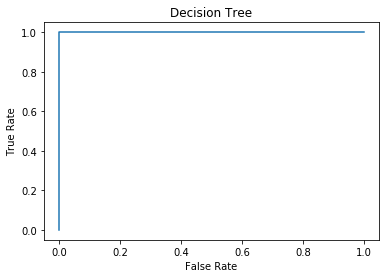

In [95]:
plt.plot(fpr,tpr,label= "Decision Tree Classification")
plt.xlabel("False Rate")
plt.ylabel('True Rate')
plt.title("Decision Tree")
plt.show()

In [96]:
from sklearn.externals import joblib
joblib.dump(knr,"Avocado Region.obj")

['Avocado Region.obj']

In [97]:
model = joblib.load("Avocado Region.obj")

In [98]:
model.predict(x_test)

array([1.23      , 1.30142857, 1.24142857, ..., 1.11571429, 1.85857143,
       1.96142857])